In [1]:
from gensim.models import Word2Vec, FastText
from sklearn.manifold import TSNE
from note_reader import get_notes_as_pitch_classes
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
plt.rcParams["font.family"] = ["Times"]
UNK_TAG = "<UNK>"

In [3]:
file_list = glob.glob("data/txt/*.txt")

In [4]:
docs, counts = get_notes_as_pitch_classes(file_list)

In [5]:
pitches_sorted = counts.most_common()
pitches, pitch_counts = zip(*pitches_sorted)

In [6]:
pitches_sorted

[('D', 141246),
 ('A', 110227),
 ('G', 109868),
 ('C', 101624),
 ('E', 81186),
 ('A#8', 62424),
 ('F', 49658),
 ('F#4', 47143),
 ('A#4', 23949),
 ('C#4', 23292),
 ('D#5', 18455),
 ('B', 16905),
 ('A#5', 14183),
 ('D#4', 11217),
 ('D#8', 8984),
 ('G#4', 8679),
 ('C#5', 6062),
 ('F#5', 5927),
 ('G#5', 5474),
 ('F#1', 2384),
 ('G#8', 287),
 ('C#8', 127),
 ('B#3', 15),
 ('F#8', 6)]

In [16]:
THRESHOLD = 20

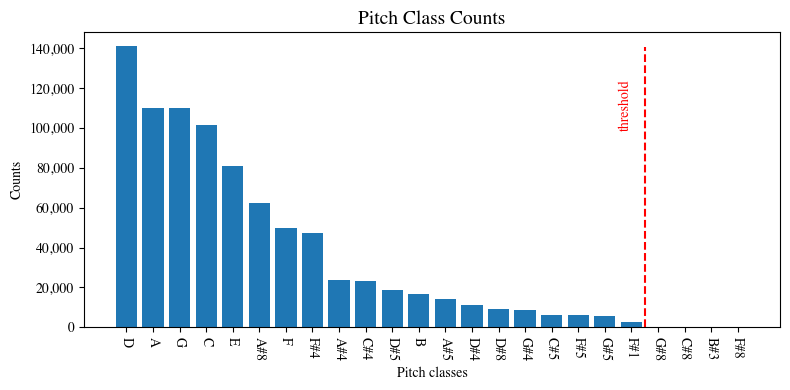

In [17]:
fig = plt.figure(figsize=(8, 4))
plt.title("Pitch Class Counts", fontdict={"fontsize": 14})
plt.xlabel("Pitch classes")
plt.xticks(rotation=-90)
plt.ylabel("Counts")
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.bar(pitches, pitch_counts)
plt.tight_layout()
plt.axvline(x=THRESHOLD-0.5, ymax=0.95, color="r", linestyle="--")
plt.text(THRESHOLD-1.5, 100000, "threshold", rotation=90, color="r")
plt.show()

In [18]:
common_pitches = [x[0] for x in counts.most_common(THRESHOLD)]
common_docs = []
for doc in docs:
    common_doc = [x if x in common_pitches else UNK_TAG for x in doc]
    common_docs.append(common_doc)

# Word2Vec model


In [19]:
w2v_model = Word2Vec(sentences=common_docs,
                     vector_size=20, epochs=10, window=4)
w2v_model.wv.most_similar(positive=["C", "A"], negative=["G"], topn=3)  # D

[('A#8', 0.3907223641872406),
 ('D', 0.2774919867515564),
 ('E', 0.24971459805965424)]

In [ ]:
w2v_model.wv.most_similar("G")

In [ ]:
w2v_model.wv.similarity("G", "A")

# Find analogies

`model.most_similar(positive=["woman", "king"], negative=["man"], topn = 1) --> "queen"`


In [ ]:
w2v_model.wv.most_similar(positive=["C", "A"], negative=["G"])  # D

# FastText model


In [ ]:
ft_model = FastText(sentences=common_docs, vector_size=10, epochs=20, window=5)
ft_model.wv.most_similar(positive=["C", "A"], negative=["G"])  # D

In [ ]:
ft_model.wv.most_similar("G")

In [ ]:
ft_model.wv["G"]

In [ ]:
np.rad2deg(np.arccos(ft_model.wv.similarity("G", "F#4")))

In [ ]:
ft_model.wv.most_similar(positive=["C", "A"], negative=["G"], topn=3)  # D

In [ ]:
ft_model.wv.most_similar(positive=["E", "G"], negative=["A"], topn=3)  # D

In [ ]:
ft_model.wv.vectors.shape

In [ ]:
ft_model.wv.key_to_index

In [ ]:
# from: https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python

def unit_vector(vector):
    return vector / np.linalg.norm(vector)


def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.rad2deg(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

In [ ]:
for current in ft_model.wv.key_to_index:
    print(f"*** {current} ***")
    for pitch in ft_model.wv.key_to_index:
        print(
            f"--> {pitch}: {round(angle_between(ft_model.wv[current], ft_model.wv[pitch]), 2)}")

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    tsne = TSNE(n_components=num_dimensions, perplexity=2, n_iter=1000)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(ft_model)
plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals)

for i in range(len(labels)):
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [ ]:
docs_nihavent, counts_nihavent = get_notes_as_pitch_classes(file_list, makam="nihavent")

In [ ]:
counts_nihavent

In [ ]:
ft_model_nihavent = FastText(sentences=docs_nihavent, vector_size=10, epochs=20, window=5)
ft_model_nihavent.wv.most_similar(positive=["C", "A"], negative=["G"])  # D

In [ ]:
x_vals_nihavent, y_nihavent, labels_nihavent = reduce_dimensions(ft_model_nihavent)
plt.figure(figsize=(6, 6))
plt.scatter(x_vals_nihavent, y_nihavent)

for i in range(len(labels_nihavent)):
    plt.annotate(labels_nihavent[i], (x_vals_nihavent[i], y_nihavent[i]))